<a href="https://colab.research.google.com/github/bomb1000/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入資料

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

# EDA

- 問題1：根據 Kaggle 文件的各個欄位定義
- 問題2：特徵分佈
- 問題3：'品質'標籤的分佈

## 問題1：根據 Kaggle 文件的各個欄位定義
固定酸度（Fixed Acidity）: 主要包含酒中的大多數酸，主要是酒石酸。你可以將其看作是建築物的「骨架」，提供基本的框架。

揮發性酸度（Volatile Acidity）: 包括乙酸，過多會導致酒味像醋。想象它像教室裡的「噪音水平」，過多會分散注意力。

檸檬酸（Citric Acid）: 以小量存在，可以為酒增加「新鮮感」。就像在菜餚中添加一點檸檬提升味道。

殘糖（Residual Sugar）: 發酵停止後剩餘的糖分量。就像甜點的甜度一樣，有人喜歡多，有人喜歡少。

氯化物（Chlorides）: 酒中的鹽分量。想象它像食物中的「鹽分」，必要但不宜過多。

游離二氧化硫（Free Sulfur Dioxide）: 這可以防止微生物生長和酒的氧化。就像博物館的保安人員，保護藝術品但不干擾觀賞。

總二氧化硫（Total Sulfur Dioxide）: 包括游離和結合形式的SO2。這是所有安全措施的總和，包括閉路電視攝像頭和警報。

密度（Density）: 酒的密度，會因糖和酒精含量而變化。想象它像果昔的濃度。

pH 值: 測量酒是酸性還是鹼性。就像菜餚的辣度一樣，有人喜歡辣，有人不喜歡。

硫酸鹽（Sulphates）: 一種酒添加劑，有助於SO2水平，起到抗菌和抗氧化作用。考慮它是讓食物保鮮更長時間的香料。

酒精（Alcohol）: 酒的酒精含量。就像辛辣食物帶來的「刺激」，重要但需要平衡。

品質（Quality）: 介於 0 和 10 之間的分數。這是最終的評價或判斷，就像在考慮所有因素後你在作業上獲得的分數。


## 問題2：特徵分佈

嘗試觀察每一個「特徵」欄位（除 quality 外）資料的分佈情況

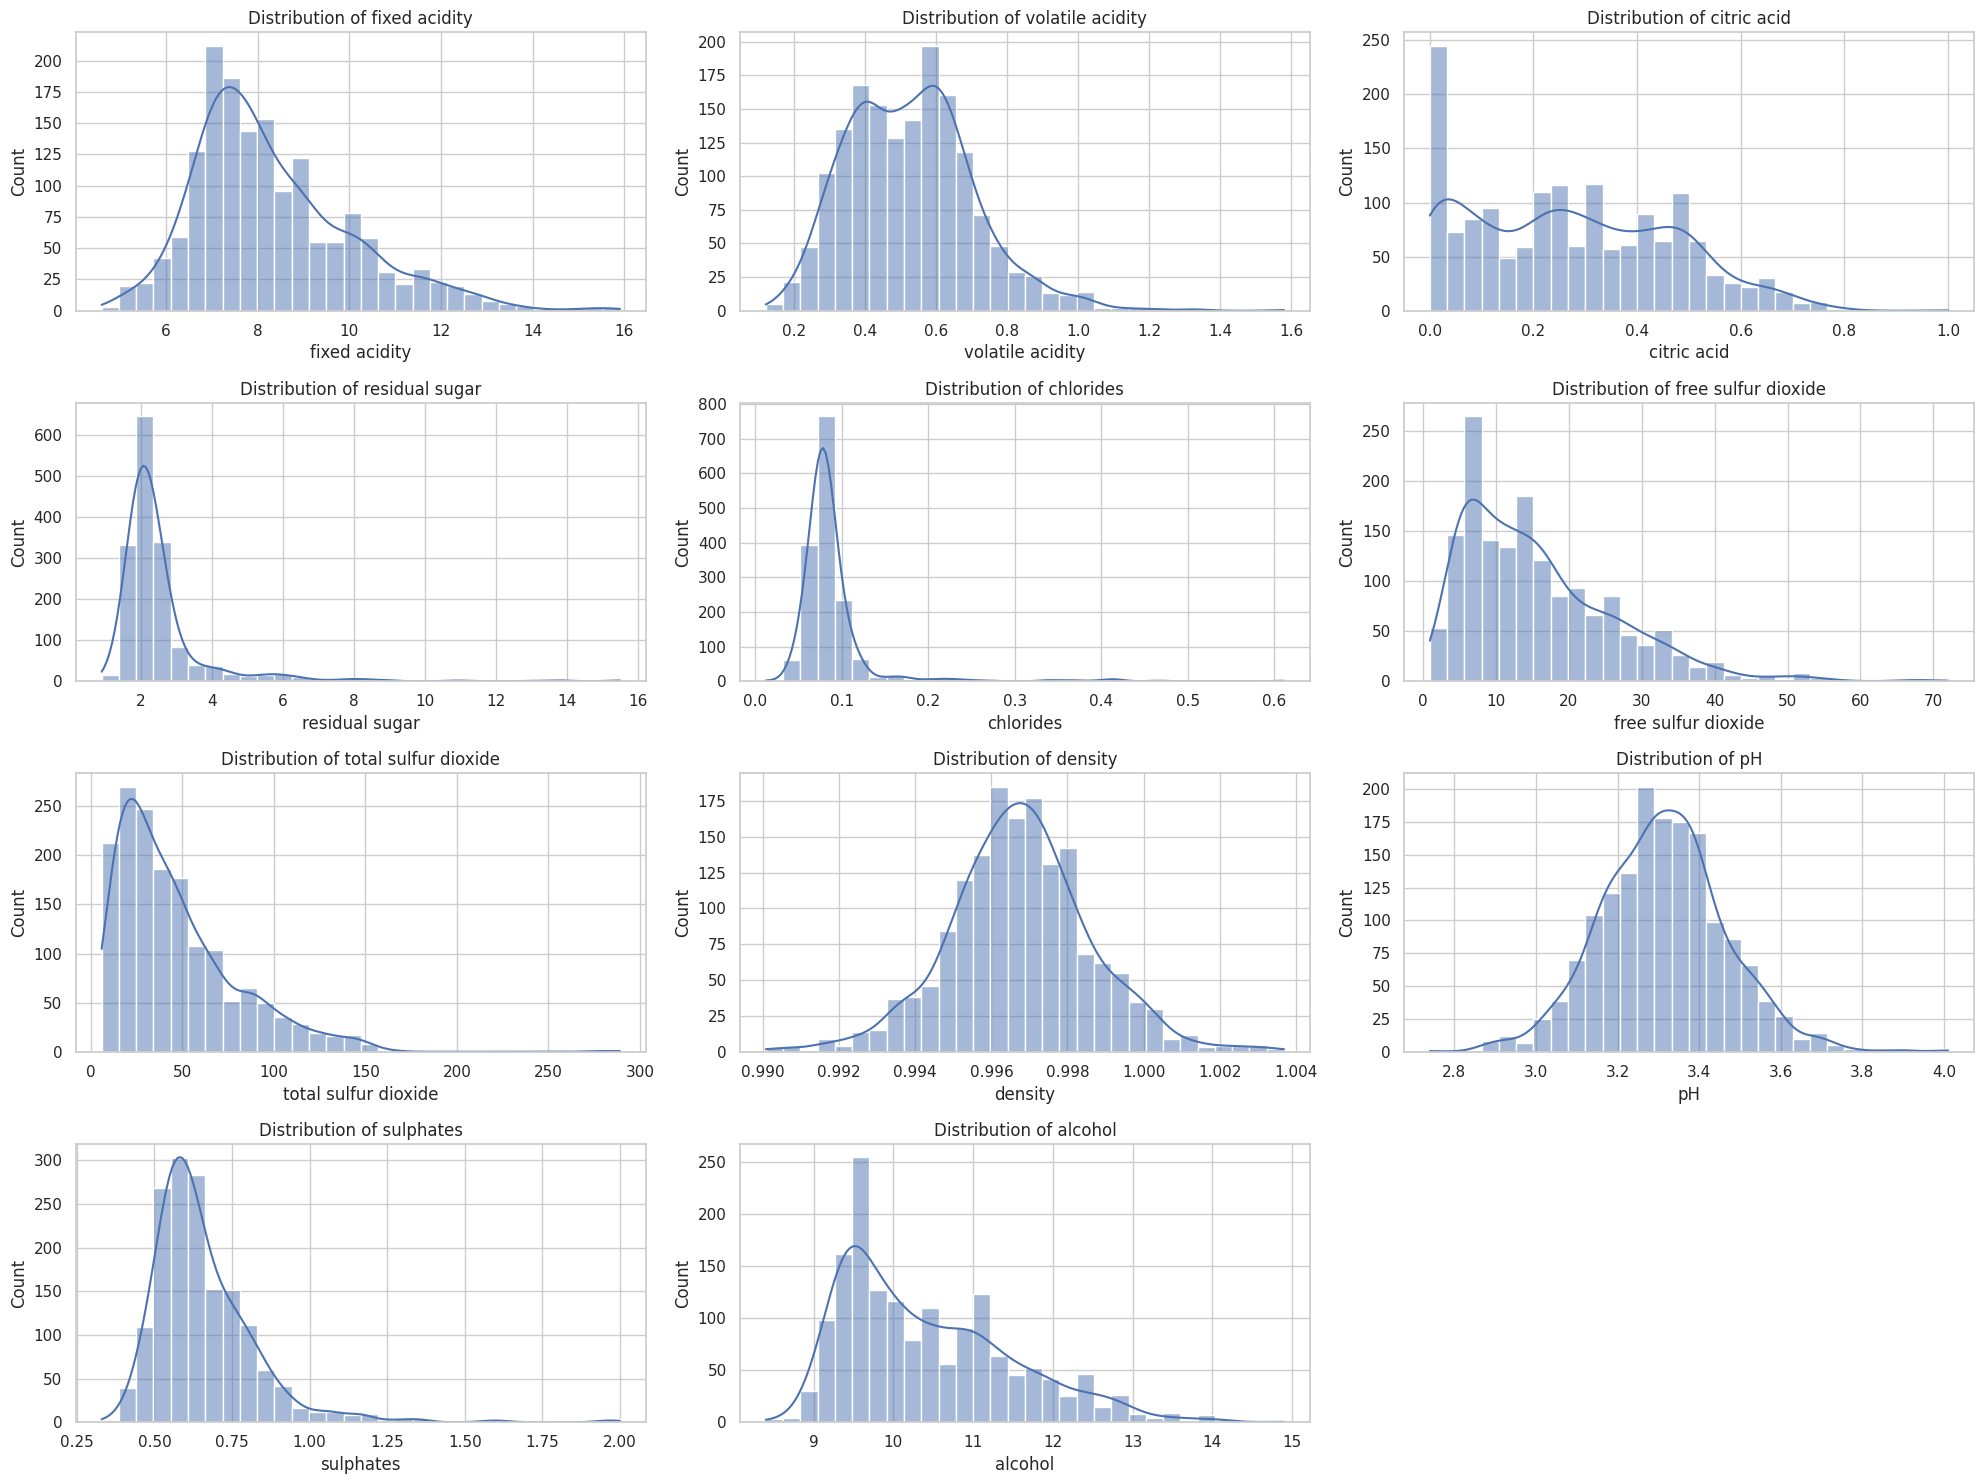

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Loop through each feature to plot a subplot
for i, column in enumerate(df.columns[:-1], 1): # 後面的1代表從1開始編號，而非0
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


## 問題3：'品質'標籤的分佈

嘗試觀察每一個「標籤(target)」欄位（quality）資料的分佈情況

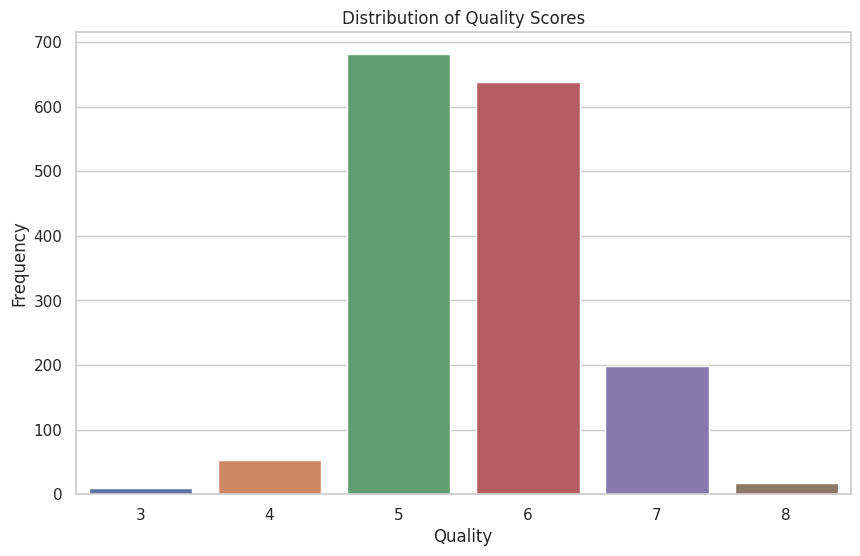

In [4]:
# Plotting the distribution of the 'quality' label
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()



大多數酒的品質分數為5或6。
非常少數的酒具有3或8的質量分數。

這讓我們了解到，數據集在質量標籤方面有些不平衡，大多數酒屬於「一般」類別。

# 建立Baseline

### 1. 在不考慮準確度的情況下，資料分析的必備環節

在不考慮準確度的前提下，資料分析的工作流程仍然有一些基本但重要的環節，就像烹飪不論多麼簡單，仍需要一些基本的步驟（如切菜、炒菜）：

1. **資料讀取（Data Loading）**: 就像去菜市場買食材一樣，首先需要將資料讀入工作環境。
  
2. **資料清洗（Data Cleaning）**: 去掉不必要的部分，填補缺失值。
  
3. **特徵選擇（Feature Selection）**: 挑選出對目標變數影響最大的特徵。

4. **資料拆分（Data Splitting）**: 將資料分為訓練集和測試集。

5. **模型訓練（Model Training）**: 使用訓練集來訓練模型。
  
6. **模型評估（Model Evaluation）**: 在測試集上評估模型的表現。

7. **結果解釋（Interpretation）**: 解釋模型的結果。

### 2. 完成 Baseline 的資料前處理

接下來，我們將執行基本的資料前處理，將原始的 `df` 轉換為適合模型訓練的 `df_train`。

我們將進行以下操作：

1. 檢查並處理缺失值。
2. 將資料集拆分為特徵（X）和目標變數（y）。
3. 將資料分為訓練集和測試集。


In [5]:
from sklearn.model_selection import train_test_split

# 1. Check for missing values and handle them (if any)
# In our case, it appears there are no missing values
missing_count = df.isnull().sum()

# 2. Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['quality'])
y = df['quality']

# 3. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display missing values count and a sample of the training set
display(missing_count, X_train.head(), y_train.head())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


493    6
354    6
342    6
834    5
705    5
Name: quality, dtype: int64

無發現缺失直，因此直接使用原始資料

In [6]:
df_train = df.copy()

根據這個紅酒質量的資料集，選擇使用以下幾種機器學習模型：

適合的機器學習模型：

* 隨機森林（Random Forest）: 隨機森林是一個很好的起點，特別是對於這種具有多個特徵和不平衡目標變數的資料集。它是多個決策樹的集合，每個樹對數據集的一部分進行訓練。

* 支持向量機（Support Vector Machines, SVM）: SVM在小至中型數據集上表現良好，並且可以處理不是線性可分的數據。

* 梯度提升樹（Gradient Boosting）: 對於不平衡數據集，梯度提升經常表現出色。它透過合併多個弱預測模型來創建一個強大的預測模型。

理由：

* 多樣性的特徵: 這個資料集包含各種不同範圍和單位的特徵，這意味著需要一個能夠自動進行特徵選擇和處理多樣性特徵的模型。隨機森林和梯度提升樹在這方面都是不錯的選擇。

* 不平衡的目標變數: 從質量（Quality）的分佈可以看出，這是一個不平衡的數據集。梯度提升樹和隨機森林通常在這種情況下表現得相對較好。

* 解釋性和精確性: 隨機森林提供了特徵重要性的評估，這對於解釋模型是非常有用的。SVM和梯度提升則更注重於精確性。

* 規模和效能: 由於這不是一個特別大的數據集，所以我們可以選擇計算量相對較大，但預測精度更高的模型，如SVM或梯度提升。

想像你是一個廚師，每種模型就像是不同的烹飪工具。隨機森林就像是一把萬能刀，適用於各種食材和菜餚。SVM則像是專門為某一道菜而設計的特殊刀具，而梯度提升則像是一個高級烤箱，專為複雜的菜餚而設計。

In [7]:
# 導入所需的庫
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [10]:
# 隨機森林模型
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
# rf_model.fit(X_train, y_train)
# rf_predictions = rf_model.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# print(f"Random Forest Accuracy: {rf_accuracy}")
rfc_eval = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 5)
print(f"Random Forest cross_val_score: {rfc_eval}")

# 支持向量機模型
svm_model = SVC()
# svm_model.fit(X_train, y_train)
# svm_predictions = svm_model.predict(X_test)
# svm_accuracy = accuracy_score(y_test, svm_predictions)
# print(f"SVM Accuracy: {svm_accuracy}")
svm_eval = cross_val_score(estimator = svm_model, X = X_train, y = y_train, cv = 5)
print(f"SVM cross_val_score: {svm_eval}")

# 梯度提升樹模型
gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train, y_train)
# gb_predictions = gb_model.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_predictions)
# print(f"Gradient Boosting Accuracy: {gb_accuracy}")
gb_eval = cross_val_score(estimator = gb_model, X = X_train, y = y_train, cv = 5)
print(f"Gradient Boosting cross_val_score: {gb_eval}")
about:blank#blocked

Random Forest cross_val_score: [0.6640625  0.6796875  0.640625   0.703125   0.75294118]
SVM cross_val_score: [0.4921875  0.5234375  0.48828125 0.48046875 0.5254902 ]
Gradient Boosting cross_val_score: [0.6328125  0.6484375  0.625      0.61328125 0.71372549]
